In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

import ksource_py as ks
import mcpl

In [ ]:
%matplotlib inline

# Crear KSource

### INPUT: Completar plantilla en una celda duplicada

In [ ]:
# Abrir lista de particulas

tracksfile = "filename"
tracksformat = "mcpl" # "mcpl", "ssw", "ptrac", "stock"
trasl = None
rot = None
x2z = False

set_params = True
plist = ks.PList(tracksformat, tracksfile, trasl=trasl, rot=rot, switch_x2z=x2z, set_params=set_params)

# Crear Geometria

trasl = None
rot = None
metric = ks.Geometry([ks.Lethargy(10), ks.Guide(7, 20, 300)], trasl=trasl, rot=rot)

#Crear KSource

J = 1
s = ks.KSource(plist, metric, bw="silv", J=J)

In [2]:
# Fuente de tracks inicial

# Abrir lista de particulas

tracksfile = "Ftes_tracks/GF12p_n"
readformat = "ptrac"
pt = 'n'
trasl = [118.5497276, -102.897199, 5.0]
rot = [0.0, 0.0, -158*np.pi/180.0]
x2z = True

set_params = True
plist = ks.PList(readformat, tracksfile, pt=pt, trasl=trasl, rot=rot, switch_x2z=x2z, set_params=set_params)

# Crear Geometria

trasl = None
rot = None
metric = ks.Geometry([ks.Lethargy(10), ks.SurfXY(0), ks.Polar()], trasl=trasl, rot=rot)

#Crear KSource

J = 3.669E+15
bw = "silv"
s = ks.KSource(plist, metric, bw=bw, J=J)

Using existing file Ftes_tracks/GF12p_n.mcpl.gz
I = 1595419.3519788086
p2 = 997207.9837281284
N = 2991283


In [2]:
# Guia

# Abrir lista de particulas

tracks = "1_guia_n/D_tracks.mcpl.gz"
readformat = "mcpl"
trasl = [0,0,300] # None
rot = [0,0,np.pi] # None
x2z = False

set_params = True
plist = ks.PList(readformat, tracks, trasl=trasl, rot=rot, switch_x2z=x2z, set_params=set_params)

# Crear Geometria

trasl = None
rot = None
metric = ks.Geometry([ks.Lethargy(10), ks.Guide(7, 20, 300, 92900)], trasl=trasl, rot=rot)

#Crear KSource

J = 1
s = ks.KSource(plist, metric, bw="silv", J=J)

Using existing file 1_guia_n/D_tracks.mcpl.gz
I = 490.71766080904985
p2 = 333.4677034391903
N = 8338


### Ajustar KSource

In [4]:
N = 1e5 # Cantidad de particulas a utilizar
s.fit(N)
s.bw /= 5 # Para graficos integrales puede usarse una bw mas baja

Usando 61484 particulas para entrenamiento
Calculando bw ... 
Hecho
Optimal bw (silv) = [ 0.47  11.096  4.403  4.589  5.951]


# Evaluar estadistica

In [ ]:
# Con MCPL

file = s.plist.filename
mcpl.dump_stats(mcpl.collect_stats(file))
mcpl.plot_stats(file)

/home/inti/Documents/Maestria/Simulaciones/ksource_py/aux.py:37: RuntimeWarning: divide by zero encountered in log
  log_E = np.log(1E-6*E)
/home/inti/Documents/Maestria/Simulaciones/ksource_py/aux.py:38: RuntimeWarning: divide by zero encountered in log
  log_H10 = np.log(1E-12*H10)


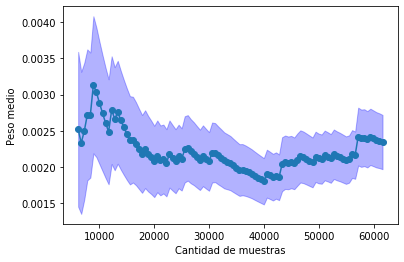

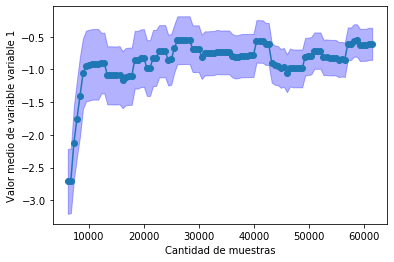

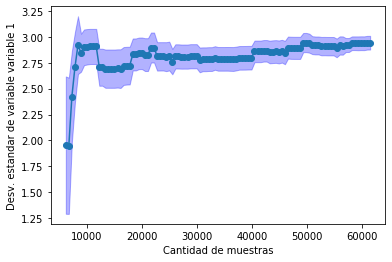

In [5]:
# Con ks.Stats

# Intervalos de variables (box)
dxymax = -1
dzmin = np.sqrt(1-dxymax**2)
maskfun = ks.Box([None,None,None,None,None,None,dzmin], None)

# Funcion de peso
fact_dosim = ks.H10(pt=plist.pt)
weightfun = lambda parts: parts[:,0]

parts,ws = plist.get()
stats = ks.Stats(parts, ws, weightfun=weightfun, maskfun=maskfun)

N,I,err = stats.mean_weight(steps=100)
plt.show()
N,mn,err = stats.mean(var=1, steps=100)
plt.show()
N,mn,err = stats.std(var=1, steps=100)
plt.show()

# Crear graficos

In [ ]:
# Graficos en E

vec0 = None # [0, -30,-30, 0.99,-180] # 
vec1 = None # [25, 30,30, 1,180]      # 
EE = np.logspace(-9.8,0,100)
fig,scores = s.plot_E(EE, vec0, vec1)
plt.show()

In [ ]:
# Graficos en xy

vec0 = None # [0, -30,-30, 0,-180]
vec1 = None # [25, 30,30, 1,180]
xx = np.linspace(-30,30,30)
yy = np.linspace(-30,30,30)
fig,scores = s.plot2D_integr([xx,yy], ["x","y"], vec0, vec1)
plt.show()

In [ ]:
# Graficos en zx

vec0 = None # [0, -10,-15,-10, -1,-1,-1]
vec1 = None # [25, 30,15,2360, 1,1,1]
zz = np.linspace(-10,2360,30)
xx = np.linspace(-10,30,30)
fig,scores = s.plot2D_integr([zz,xx], ["z","x"], vec0, vec1)
plt.show()

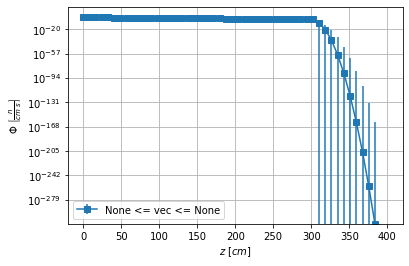

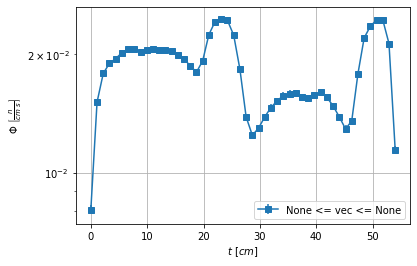

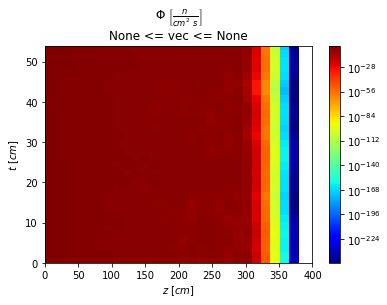

In [6]:
# Graficos en zt (guia)

DZ = 400

vec0 = None # [0, 0,0, -1,-1,-1]
vec1 = None # [25, DZ,54, 1,1,1] 
zz = np.linspace(0,DZ,50)
fig,scores = s.plot_integr(zz, 1, vec0, vec1)
plt.show(block=True)

vec0 = None # [0, 0,0, -1,-1,-1]
vec1 = None # [25, DZ,54, 1,1,1] 
tt = np.linspace(0,54,50)
fig,scores = s.plot_integr(tt, 2, vec0, vec1)
plt.show(block=True)

vec0 = None # [0, 0,0, -1,-1,-1] # [0, -30,-30, 0,-np.pi]
vec1 = None # [25, DZ,54, 1,1,1] # [25, 30,30, 1,np.pi]
zz = np.linspace(0,DZ,30)
tt = np.linspace(0,54,30)
fig,scores = s.plot2D_integr([zz,tt], ["z","t"], vec0, vec1, scale="log")
plt.show(block=True)

In [ ]:
# Graficos polares

vec0 = None # [20, -30,-30, 0,-180]
vec1 = None # [25, 30,30, 1,180]
tt = np.linspace(0,90,50)
fig,scores = s.plot_integr(tt, 3, vec0, vec1)
plt.show()

vec0 = None # [0, -30,-30, 0,-180]
vec1 = None # [25, 30,30, 180,180]
pp = np.linspace(-180,180,50)
fig,scores = s.plot_integr(pp, 4, vec0, vec1)
plt.show()

vec0 = None # [0, -30,-30, 0,-180]
vec1 = None # [25, 30,30, 180,180]
tt = np.linspace(0,90,30)
pp = np.linspace(-180,180,30)
fig,[scores,errs] = s.plot2D_integr([tt,pp], ["mu","phi"], vec0, vec1)
plt.show()

In [ ]:
# Graficos isotrop

vec0 = None # [0, 0,0, -1,-1,-1]
vec1 = None # [25, 500,20, 1,1,1] 
ddz = np.linspace(0.98,1,50)
fig,scores = s.plot_integr(ddz, "dz", vec0, vec1)
plt.show()

vec0 = None # [0, 0,0, -1,-1,-1] # None # 
vec1 = None # [25, 300,20, 1,1,1] # None # 
ddy = np.linspace(-0.05,0.05,50)
fig,scores = s.plot_integr(ddy, "dy", vec0, vec1)
plt.show()

vec0 = None # [0, 0,0, -1,-1,-1]
vec1 = None # [25, 500,54, 1,1,1] 
ddx = np.linspace(-0.05,0.05,20)
ddy = np.linspace(-0.05,0.05,20)
fig,[scores,errs] = s.plot2D_integr([ddx,ddy], ["dx","dy"], vec0, vec1)
plt.show()

# Optimizar BW

In [3]:
# Metodo de Silverman

s.bw_method = "silv"
N = 1E4
s.fit(N, N_tot=2991283)

Usando 7064 particulas para entrenamiento
Calculando bw ... 
Hecho
Optimal bw (silv) = [  0.258 105.837   2.905   0.351   0.36 ]


Usando 7064 particulas para entrenamiento
Calculando bw ... 
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    3.7s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    4.4s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    5.4s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    6.5s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    7.7s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    8.7s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:   10.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   11.7s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:   13.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   14.9s
[Parallel(

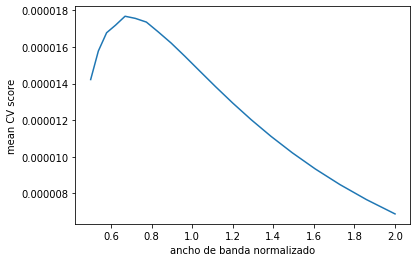

Verificar que el grafico presenta un maximo
Hecho
Optimal bw (mlcv) = [  0.332 136.215   3.739   0.452   0.463]


In [3]:
# Metodo de Max Likelihood Cross Validation

s.bw_method = "mlcv"
N = 1E4
s.fit(N, N_tot=s.plist.N, steps=20, max_fact=2, shift=1)

In [4]:
# Metodo de K Nearest Neighbours

s.bw_method = "knn"
N = -1
s.fit(N, seed=s.bw)

print("Mean bw:")
print(s.bw.mean(axis=0))

Usando 7064 particulas para entrenamiento
Calculando bw ... 
Usando K = 0
batch = 1 / 1
Hecho
Optimal bw (knn) = [[  0.418 171.527   4.708   0.569   0.583]
 [  0.474 194.234   5.332   0.644   0.661]
 [  0.584 239.44    6.573   0.794   0.814]
 ...
 [  0.377 154.412   4.239   0.512   0.525]
 [  0.426 174.848   4.8     0.58    0.595]
 [  0.404 165.701   4.549   0.55    0.564]]
Mean bw:
[  0.451 185.125   5.082   0.614   0.63 ]


In [ ]:
# Graficos de bw variable

if N>s.plist.N: N = s.plist.N
bws = (s.bw / s.metric.std(vecs=s.vecs))[:,0]

Es = s.metric.E.inverse_transform(s.vecs[:N,0])
plt.plot(Es, bws, 'o')
plt.ylabel("bandwidth")
plt.xlabel("E [MeV]")
plt.xscale("log")
plt.show()

xs = s.vecs[:N,1]
ys = s.vecs[:N,2]
plt.scatter(xs, ys, c=bws)
plt.colorbar()
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.show()

mus = s.vecs[:N,5]
plt.plot(mus, bws, 'o')
plt.ylabel("bandwidth")
plt.xlabel("mu []")
plt.show()

# Guardar KSource

In [5]:
sourcefilename = None
bwfilename = None # Solo si bw variable

s.save(sourcefilename, bwfilename)

Archivo de definicion de fuente: 1_guia_n/D_tracks_source.txt
Archivo de anchos de banda: 1_guia_n/D_tracks_bws.ssv
